In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
df = pd.read_csv("College_Data")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad.Rate    777 non-null    int64  
dtypes: float

In [5]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [6]:
df["Private"] = pd.get_dummies(df["Private"], drop_first=True)

<AxesSubplot:>

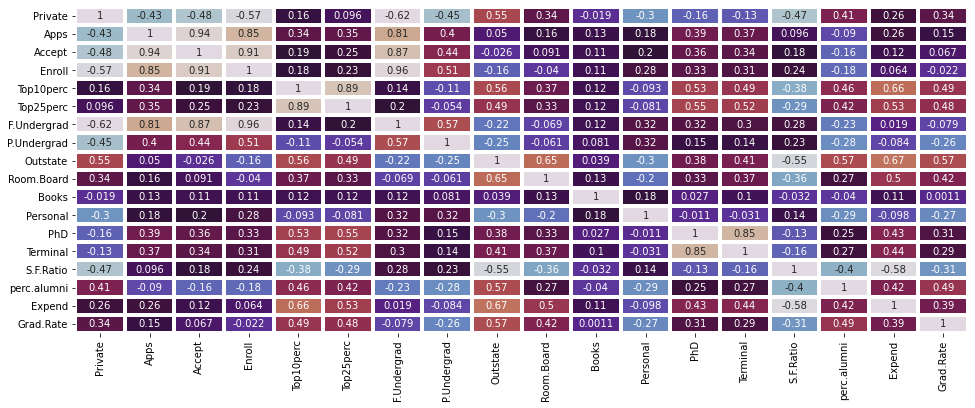

In [7]:
plt.figure(figsize=(16,6))
sns.heatmap(df.corr(), annot = True, cmap="twilight", cbar=False, linecolor="white", linewidths=3)

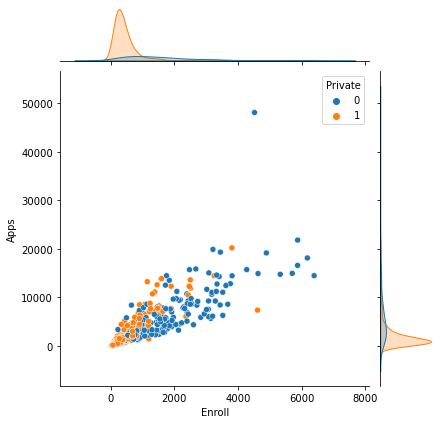

In [8]:
sns.jointplot(x = df["Enroll"], y = df["Apps"], hue= df["Private"])

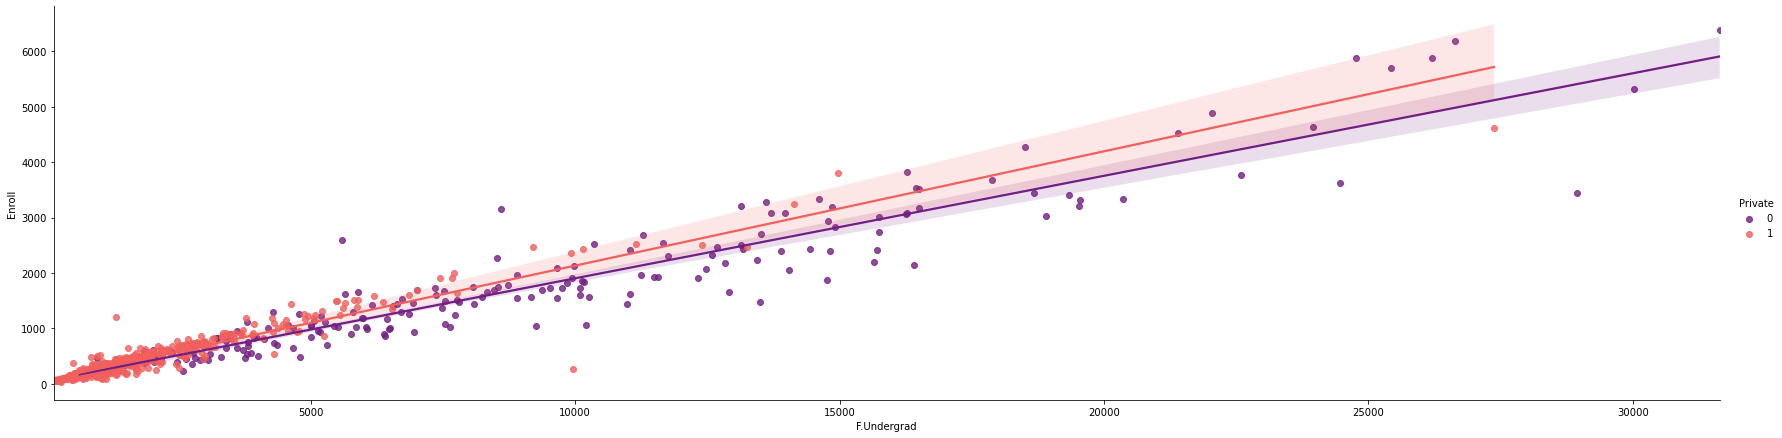

In [9]:
sns.lmplot(x = "F.Undergrad", y= "Enroll", data=df, aspect=4, height=6, hue = "Private", palette="magma")

In [10]:
df

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,0,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,1,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,1,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,1,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


## Logistic Regression

In [11]:
X = df.drop("Private" , axis= 1)
y = df["Private"]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [13]:
log_model = LogisticRegression(n_jobs=400)

In [14]:
log_model.fit(X_train, y_train)

LogisticRegression(n_jobs=400)

In [15]:
log_pred = log_model.predict(X_test)

In [16]:
print(classification_report(log_pred, y_test))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84        67
           1       0.93      0.95      0.94       167

    accuracy                           0.91       234
   macro avg       0.89      0.88      0.89       234
weighted avg       0.91      0.91      0.91       234



## Random Forest

In [17]:
rf_model = RandomForestClassifier(n_estimators= 200, n_jobs=400)

In [18]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, n_jobs=400)

In [19]:
rf_pred = rf_model.predict(X_test)

In [20]:
print(classification_report(rf_pred, y_test))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86        62
           1       0.95      0.94      0.95       172

    accuracy                           0.92       234
   macro avg       0.90      0.91      0.90       234
weighted avg       0.92      0.92      0.92       234



## k Nearest

In [27]:
kn_Model = KNeighborsClassifier(n_neighbors=10)

In [28]:
kn_Model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [29]:
kn_predict = kn_Model.predict(X_test)

In [30]:
print(classification_report(kn_predict, y_test))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90        60
           1       0.98      0.95      0.97       174

    accuracy                           0.95       234
   macro avg       0.93      0.94      0.93       234
weighted avg       0.95      0.95      0.95       234



## ELBOW METHOD
- Will use to make improvments and more accurate K value
- 10 will be a good K value for the first drip in error so lets try that above

In [31]:
errorRate = []
for i in range(1,50):
    mod = KNeighborsClassifier(n_neighbors=i, n_jobs=400)
    mod.fit(X_train, y_train)
    pred = mod.predict(X_test)
    errorRate.append(np.mean(pred != y_test))

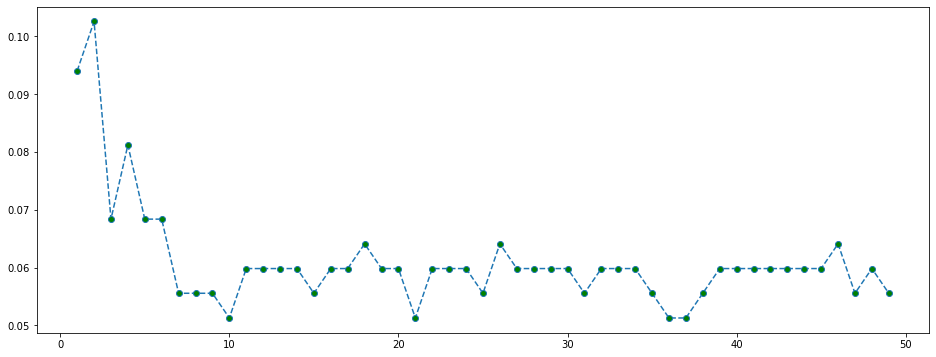

In [32]:
plt.figure(figsize=(16,6))
plt.plot(range(1,50), errorRate, ls = "--", marker  = "o", mfc = "green")

## SVM
- Suport Vector Machine

In [33]:
svm = SVC()

### Scaling in needed for the data since SVM are based arund Variance

In [34]:
scalar = StandardScaler()

In [35]:
scaledData = scalar.fit_transform(df.drop("Private", axis = 1))

In [40]:
scaleddf = pd.DataFrame(scaledData, columns= df.drop("Private", axis = 1).columns)

In [42]:
scaleddf.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,-0.346882,-0.321205,-0.063509,-0.258583,-0.191827,-0.168116,-0.209207,-0.746356,-0.964905,-0.602312,1.270045,-0.163028,-0.115729,1.013776,-0.867574,-0.501910,-0.318252
1,-0.210884,-0.038703,-0.288584,-0.655656,-1.353911,-0.209788,0.244307,0.457496,1.909208,1.215880,0.235515,-2.675646,-3.378176,-0.477704,-0.544572,0.166110,-0.551262
2,-0.406866,-0.376318,-0.478121,-0.315307,-0.292878,-0.549565,-0.497090,0.201305,-0.554317,-0.905344,-0.259582,-1.204845,-0.931341,-0.300749,0.585935,-0.177290,-0.667767
3,-0.668261,-0.681682,-0.692427,1.840231,1.677612,-0.658079,-0.520752,0.626633,0.996791,-0.602312,-0.688173,1.185206,1.175657,-1.615274,1.151188,1.792851,-0.376504
4,-0.726176,-0.764555,-0.780735,-0.655656,-0.596031,-0.711924,0.009005,-0.716508,-0.216723,1.518912,0.235515,0.204672,-0.523535,-0.553542,-1.675079,0.241803,-2.939613


In [43]:
X = scaledData
y = df["Private"]

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [46]:
svm.fit(X_train, y_train)

SVC()

In [47]:
svm_pred = svm.predict(X_test)

In [48]:
svm_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1], dtype=uint8)

In [49]:
print(classification_report(svm_pred, y_test))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86        57
           1       0.97      0.93      0.95       177

    accuracy                           0.93       234
   macro avg       0.89      0.92      0.91       234
weighted avg       0.93      0.93      0.93       234



## Improving with Grid Search

In [50]:
graphParam = {'C': [1, 10, 100, 1000], 'gamma': [0.1, 0.01, 0.001, 0.0001]}

In [51]:
graphModel = GridSearchCV(estimator=SVC(), param_grid=graphParam)

In [52]:
graphModel.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [0.1, 0.01, 0.001, 0.0001]})

In [53]:
graph_Pred = graphModel.predict(X_test)

In [54]:
print(classification_report(graph_Pred, y_test))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86        61
           1       0.96      0.94      0.95       173

    accuracy                           0.93       234
   macro avg       0.90      0.91      0.91       234
weighted avg       0.93      0.93      0.93       234

